##### Importing required packages for data manipulation, clean and visualisation

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

##### Import Dataset

In [79]:
data = pd.read_csv('hotel_bookings.csv')
print(data.shape)
data.head()

(119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#### Check Null Values ColumnWise

In [80]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#### Drop Columns and Rows with Null Values

In [81]:
data = data.drop(columns = ['agent', 'company'])
data = data.dropna(axis = 0)

In [7]:
#Check to see if there are any more NaN data 
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

#### Correlation Matrix

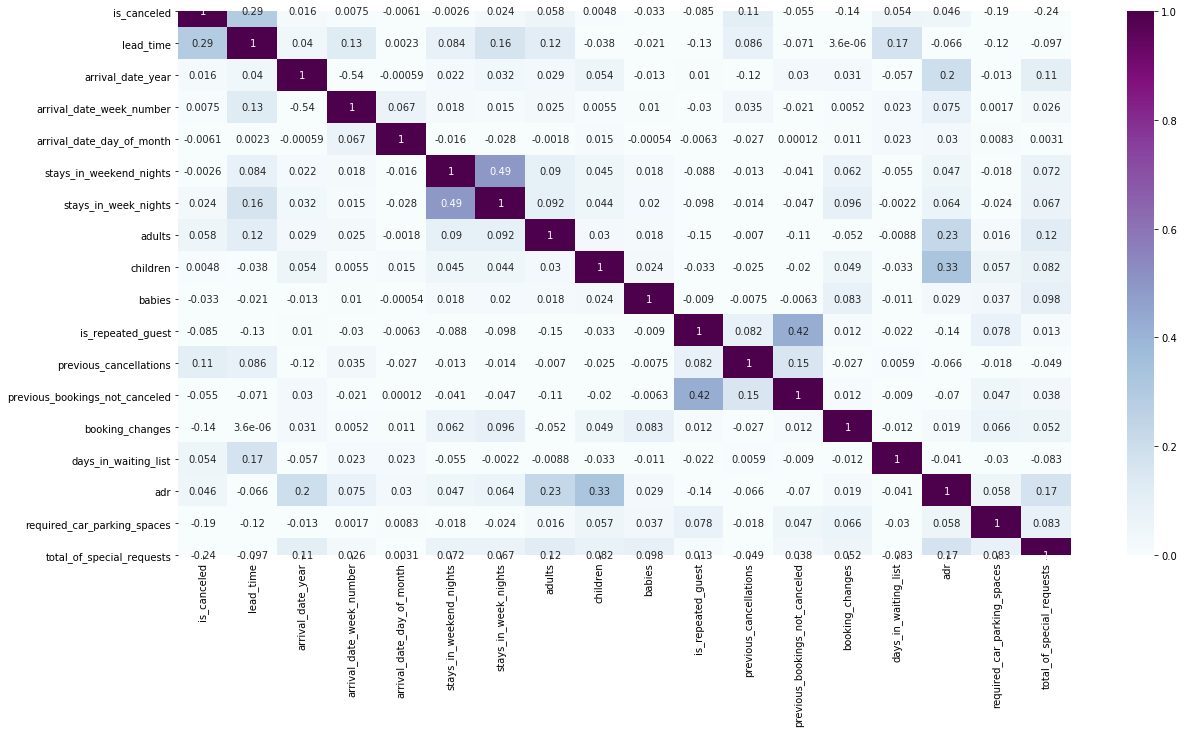

In [57]:
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr(),
            cmap = 'BuPu',
            vmin = 0,
            annot = True)

#### Hotel Types

In [58]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

Plot PieChart for it

In [59]:
labels = data['hotel'].value_counts().index.tolist()
print(labels)
sizes = data['hotel'].value_counts().tolist()
print(sizes)

['City Hotel', 'Resort Hotel']
[79302, 39596]


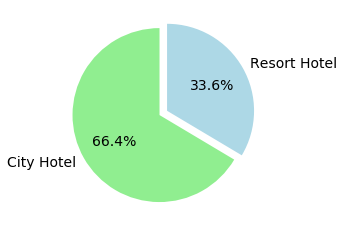

In [45]:
#labels = 'City Hotel', 'Resort Hotel'
labels = data['hotel'].value_counts().index.tolist()
sizes = data['hotel'].value_counts().tolist()
explode = (0, 0.1)
colors = ['lightgreen','lightblue']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

The City hotel has more customers by a significant amount than the Resort hotel.

#### Check Is Cancelled Counts

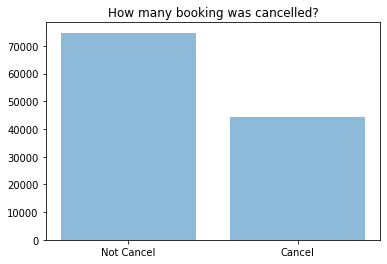

In [61]:
bars =  ['Not Cancel','Cancel']
height = data['is_canceled'].value_counts().tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , alpha = 0.5)
plt.xticks(y_pos, bars)
plt.title("How many booking was cancelled?")
plt.show()

### Hotel Wise Cancellations

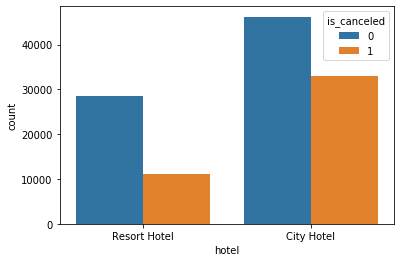

In [12]:
sns.countplot(x='hotel',data=data,hue='is_canceled')
plt.show()

#### Month Wise Booking Counts

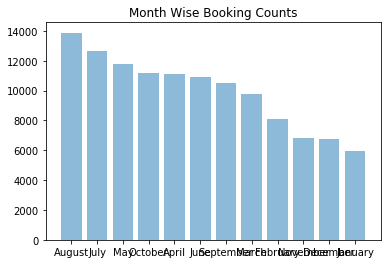

In [46]:
bars =  data['arrival_date_month'].value_counts().index.tolist()
height = data['arrival_date_month'].value_counts().tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , alpha = 0.5)
plt.xticks(y_pos, bars)
plt.title("Month Wise Booking Counts")
plt.show()

Most of the bookings occur in the period of July - August

#### Month wise and hotel wise arrivals 

Text(0, 0.5, 'Count')

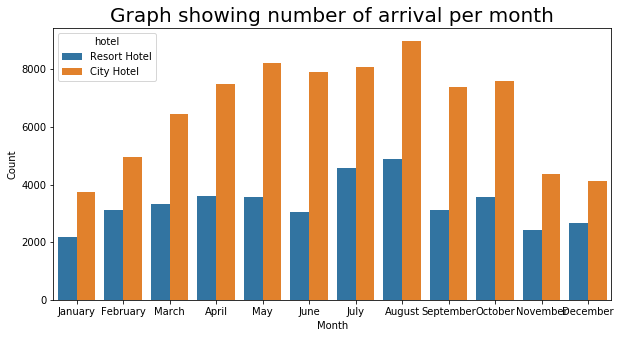

In [47]:
plt.figure(figsize=(10,5))
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
sns.countplot(data = data, x = 'arrival_date_month', hue = 'hotel', order = months).set_title('Graph showing number of arrival per month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')

City Hotels saw more number of arrivals in July August.

### Cancellations per month for both types of hotels

Text(0, 0.5, 'Count')

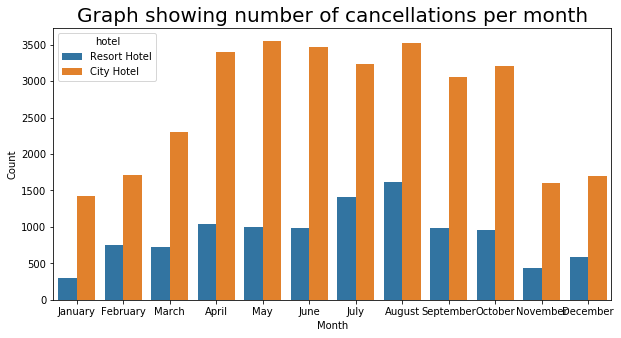

In [119]:
plt.figure(figsize=(10,5))
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
sns.countplot(data = cancelled_data, x = 'arrival_date_month', hue = 'hotel', order = months).set_title('Graph showing number of cancellations per month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')

#### Stays in weekends_night vs weekdaynights

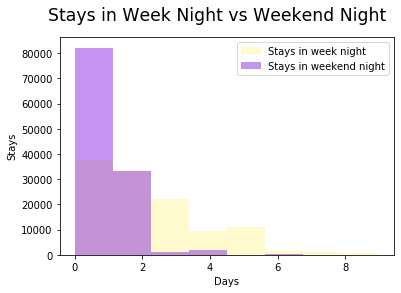

In [114]:
x = data['stays_in_week_nights']
y = data['stays_in_weekend_nights']

plt.hist(data['stays_in_week_nights'][data['stays_in_week_nights']<10],bins=8,alpha = 1,color = 'lemonchiffon',label='Stays in week night' )
plt.hist(data['stays_in_weekend_nights'][data['stays_in_weekend_nights']<10],bins=8, alpha = 0.5,color = 'blueviolet',label='Stays in weekend night' )
#plt.hist(x,bins=8,alpha = 1,color = 'lemonchiffon',label='Stays in week night' )
#plt.hist(y,bins=8, alpha = 0.5,color = 'blueviolet',label='Stays in weekend night' )

plt.ylabel('Stays')
plt.xlabel('Days')
plt.title("Stays in Week Night vs Weekend Night ", fontdict=None, position= [0.48,1.05], size = 'xx-large')
plt.legend(loc='upper right')
plt.show()

Stay over weekday nights are more than stay over weekends nights.

#### Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

In [82]:
print("The highest value is : ", data['adr'].max())
print("The lowest value is : ", data['adr'].min())

The highest value is :  5400.0
The lowest value is :  -6.38


The column seems to have many outliers because of the huge gap between highest and lowest values

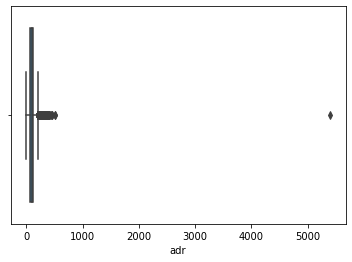

In [17]:
ax = sns.boxplot(x=data['adr'])

#### Average daily rate =  SumOfAllLodgingTransaction/TotalNumberOfStayingNight 
#### average daily rate per person =  ADRAdults+Children 
#### We will need to find out average daily rate per person

C:\Users\Renuka Deshpande\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


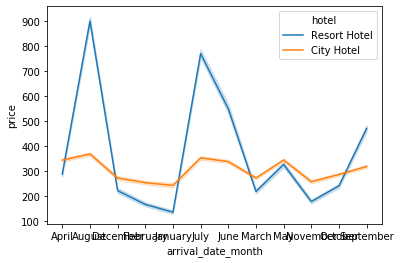

In [62]:
# Calculating average daily rate per person
data['adr_pp'] = data['adr'] / (data['adults'] + data['children']) 
actual_guests = data.loc[data["reservation_status"] != 'Canceled']
#print(actual_guests)
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')

Prices of resort hotel are much higher. It seems that that is definitely the case since resort hotels specialise in that.
Prices of city hotel do not fluctuate that much.

### Date of Cancellation vs Date of Arrival
#### We first need to create a new column called arrival_date that combines arrival date year, month and date. 
#### We then compare arrival_date to cancellation date to find out how the cancellation happens. 
#### Cancellation date can be identified from reservation_status_date for reservation_status = Cancelled

In [83]:
data['arrival_date'] = data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month'] + '-' + data['arrival_date_day_of_month'].astype(str)
data['arrival_date'] = data['arrival_date'].apply(pd.to_datetime)
data['reservation_status_date'] = data['reservation_status_date'].apply(pd.to_datetime)

Check number of days before which the customer cancels.

In [84]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [85]:
cancelled_data = data[data['reservation_status'] == 'Canceled']
cancelled_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06,2015-07-01
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22,2015-07-01
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,0,No Deposit,0,Transient,123.0,0,0,Canceled,2015-06-23,2015-07-01
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,0,No Deposit,0,Transient,107.0,0,2,Canceled,2015-05-11,2015-07-01
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,0,No Deposit,0,Transient,108.3,0,2,Canceled,2015-05-29,2015-07-01


In [64]:
#cancelled_data['canc_to_arrival_days'] = cancelled_data['arrival_date'] - cancelled_data['reservation_status_date']
#cancelled_data['canc_to_arrival_days'] = cancelled_data['canc_to_arrival_days'].dt.days

#cancelled_data['canc_to_arrival_days'] = [int(i.days) for i in (cancelled_data.arrival_date - cancelled_data.reservation_status_date)]

#date1=cancelled_data['arrival_date'][0]
#date2=cancelled_data['reservation_status_date'][0]
#mdate1 = datetime.datetime.strptime(date1, "%Y-%m-%d").date()
#rdate1 = datetime.datetime.strptime(date2, "%Y-%m-%d").date()
#delta =  (mdate1 - rdate1).days
#print (delta)

Plotting the data

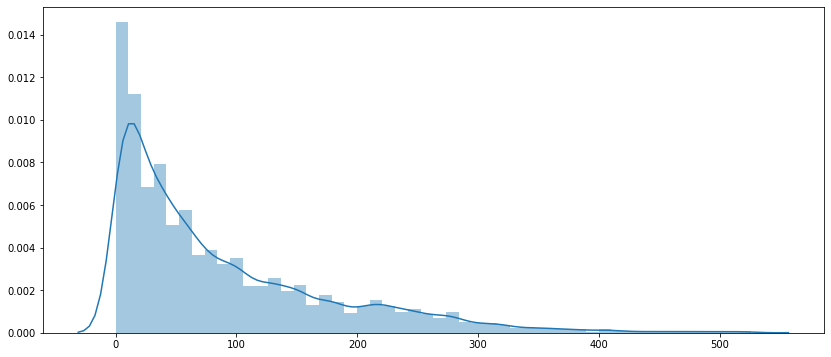

In [50]:
plt.figure(figsize=(14,6))
#sns.distplot(cancelled_data['canc_to_arrival_days'])
sns.distplot([int(i.days) for i in (cancelled_data.arrival_date - cancelled_data.reservation_status_date)])
plt.show()

### Cancellations more for which kind of hotel

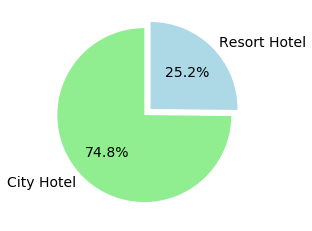

In [63]:
#labels = 'City Hotel', 'Resort Hotel'
labels = cancelled_data['hotel'].value_counts().index.tolist()
sizes = cancelled_data['hotel'].value_counts().tolist()
explode = (0, 0.1)
colors = ['lightgreen','lightblue']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

### What type of customers cancel more for each hotel type?

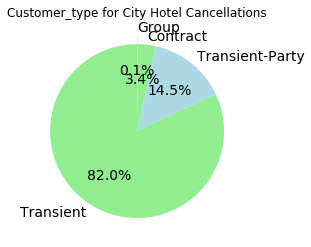

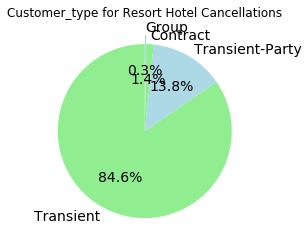

In [64]:
cancelled_data_city = cancelled_data[cancelled_data['hotel'] == 'City Hotel']
labels = cancelled_data_city['customer_type'].value_counts().index.tolist()
sizes = cancelled_data_city['customer_type'].value_counts().tolist()
explode = (0,0,0, 0.1)
colors = ['lightgreen','lightblue']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.title('Customer_type for City Hotel Cancellations')
plt.show()

cancelled_data_resort = cancelled_data[cancelled_data['hotel'] == 'Resort Hotel']
labels = cancelled_data_resort['customer_type'].value_counts().index.tolist()
sizes = cancelled_data_resort['customer_type'].value_counts().tolist()
explode = (0,0,0, 0.1)
colors = ['lightgreen','lightblue']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.title('Customer_type for Resort Hotel Cancellations')
plt.show()

Transient type of customers make more cancellations for both types of hotels.

#### Country wise cancellations for both hotel types:

In [103]:
country_data = cancelled_data_city['country'].value_counts()
for i in (country_data):
    country_data1 = (country_data/country_data_sum.sum())*100
print(country_data1)

country_data = cancelled_data_resort['country'].value_counts()
for i in (country_data):
    country_data1 = (country_data/country_data_sum.sum())*100
print(country_data1)

PRT    60.789801
FRA     5.264303
GBR     4.776119
ESP     4.064055
ITA     3.840174
         ...    
CRI     0.003109
VGB     0.003109
MUS     0.003109
HND     0.003109
UZB     0.003109
Name: country, Length: 125, dtype: float64
PRT    22.394279
GBR     2.723881
ESP     2.605721
IRL     1.340174
FRA     0.649876
         ...    
LTU     0.003109
FJI     0.003109
TUN     0.003109
KWT     0.003109
SYC     0.003109
Name: country, Length: 71, dtype: float64


In both cases PRT makes most cancellations.

### Cancellations where reserved_room_type not equal to assigned_room_type

In [110]:
cancelled_data_resmismatch = cancelled_data[cancelled_data['reserved_room_type'] != cancelled_data['assigned_room_type']]
#print(cancelled_data_resmismatch)
print(cancelled_data_resmismatch.shape)

(588, 32)


We can say that there are very few records where Cancellations where reserved_room_type not equal to assigned_room_type

### Lead Time Distribution

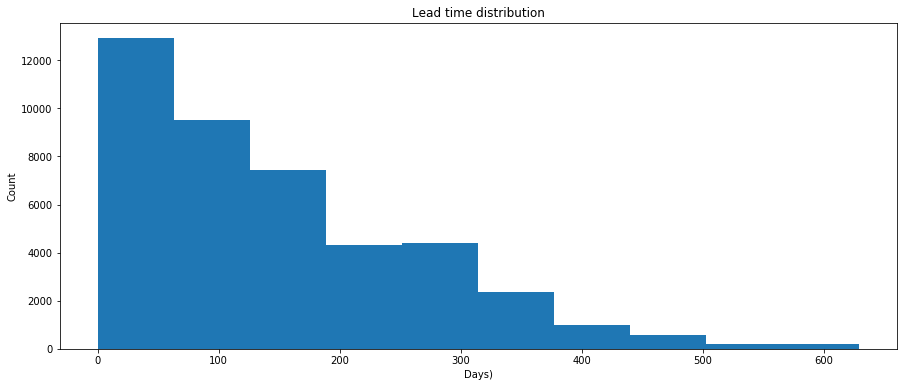

In [126]:
plt.hist(cancelled_data['lead_time'])

plt.ylabel('Count')
plt.xlabel('Days)')
plt.title("Lead time distribution")
plt.show()

### Deposit type when there was a cancellation

Text(0.5, 1.0, 'Graph showing types of deposits')

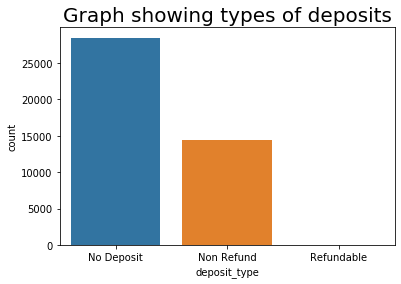

In [15]:
sns.countplot(data = cancelled_data, x = 'deposit_type').set_title('Graph showing types of deposits', fontsize = 20)

Majority of the booking does not require deposit. That could explain why cancellation rate was high.

### Repeated Guests Data

Text(0.5, 1.0, 'Graph showing whether guest is repeated guest')

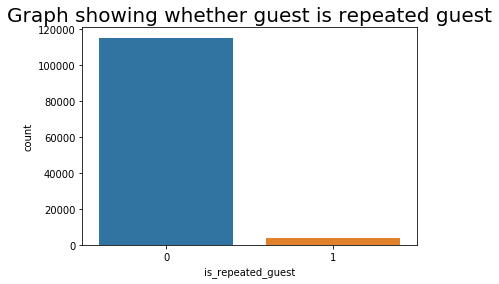

In [16]:
sns.countplot(data = data, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)

Low number of repeated guests.

### Market Segment vs cancellations

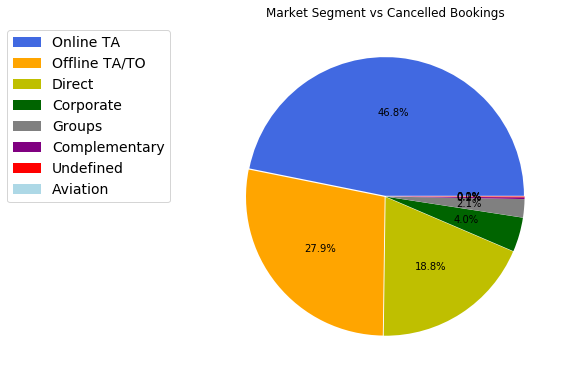

In [51]:
plt.figure(figsize=(8,8))
explode = [0.005] * len(cancelled_data['market_segment'].unique())
colors = ['royalblue','orange','y','darkgreen','gray','purple','red','lightblue']
plt.pie(cancelled_data['market_segment'].value_counts(),
       autopct = '%.1f%%',
       explode = explode,
       colors = colors)
plt.legend(cancelled_data['market_segment'].unique(), bbox_to_anchor=(-0.1, 1.),
           fontsize=14)
plt.title('Market Segment vs Cancelled Bookings')
plt.tight_layout()
plt.show()

### Creating Dummy Variables for categorical data

In [86]:
data = pd.concat([data, 
                 pd.get_dummies(data['hotel'], drop_first=True), 
                 pd.get_dummies(data['market_segment'], drop_first=True),
                 pd.get_dummies(data['distribution_channel'], drop_first=True),
                 pd.get_dummies(data['customer_type'], drop_first=True)
                 ], axis=1)
data = data.drop(['hotel','arrival_date_month','market_segment','distribution_channel','customer_type'], axis=1)

In [87]:
data = data.drop(['meal','country','reserved_room_type','assigned_room_type','deposit_type','reservation_status','reservation_status_date','arrival_date'], axis=1)

In [88]:
data.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,Groups,Offline TA/TO,Online TA,Direct,GDS,TA/TO,Undefined,Group,Transient,Transient-Party
0,0,342,2015,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,2015,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,2015,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,2015,27,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,1,0,0,1,0,0,1,0


In [89]:
data.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'Resort Hotel', 'Complementary',
       'Corporate', 'Direct', 'Groups', 'Offline TA/TO', 'Online TA', 'Direct',
       'GDS', 'TA/TO', 'Undefined', 'Group', 'Transient', 'Transient-Party'],
      dtype='object')

#### Set Dependent and indpendent variables

In [91]:
x = data.drop('is_canceled', axis=1)
y = data['is_canceled']

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))


C:\Users\Renuka Deshpande\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.79      0.89      0.84     24701
           1       0.77      0.60      0.67     14536

    accuracy                           0.79     39237
   macro avg       0.78      0.75      0.76     39237
weighted avg       0.78      0.79      0.78     39237

[[22065  2636]
 [ 5796  8740]]
0.7851007977164411


##### Precision score means the the level up-to which the prediction made by the model is precise. The precision for a is_canceled is 0.77 and for the not_canceled is 0.79.

##### Recall is the amount up-to which the model can predict the outcome. Recall for is_canceled is 0.60 and for not_canceled is 0.89. 

### Confusion Matrix:

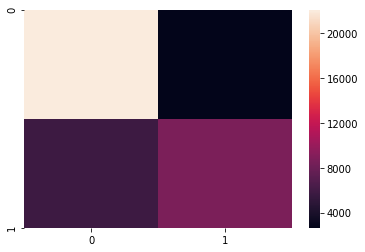

In [93]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)))
plt.show()

#### Out of all the predictions, the classifier predicted yes for the total 14536 times, out of which 8740 were actual yes.
#### Out of all the predictions, the classifier predicted no for the total 24701 times, out of which 22065 were actual no.

### Accuracy:

#### Accuracy score is the percentage of accuracy of the predictions made by the model. For our model the accuracy score is 0.78, which is considerably quite accurate.